In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from sparse_ir import FiniteTempBasis
from sparse_ir.spr import SparsePoleRepresentation

%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
wmax = 1
lambda_ = 1e+4
beta = lambda_/wmax
noise = 1e-5

basis = FiniteTempBasis("F", beta, wmax, eps=1e-10)

In [5]:
spr = SparsePoleRepresentation(basis)

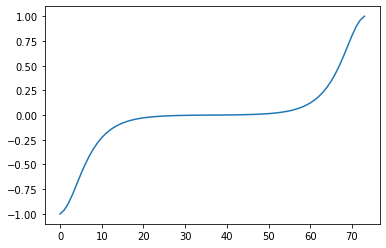

In [6]:
plt.plot(spr.sampling_points)

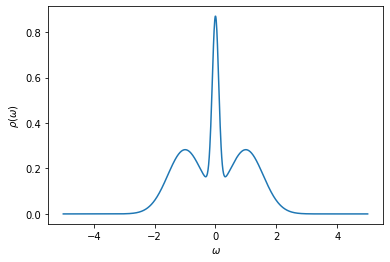

In [7]:
# Three Gaussian peaks (normalized to 1)
gaussian = lambda x, mu, sigma:\
    np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)

rho = lambda omega: 0.2*gaussian(omega, 0.0, 0.15) + \
    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

omegas = np.linspace(-5, 5, 1000)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\rho(\omega)$')
plt.plot(omegas, rho(omegas))

(1e-05, 3.0744000180788653)

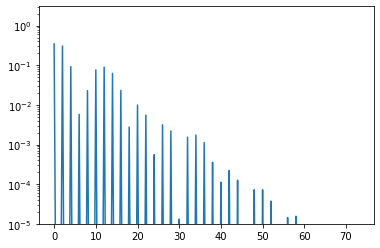

In [8]:
rhol = basis.v.overlap(rho)
plt.semilogy(np.abs(rhol))
plt.ylim([1e-5, None])

(1e-05, 1.2263682786476215)

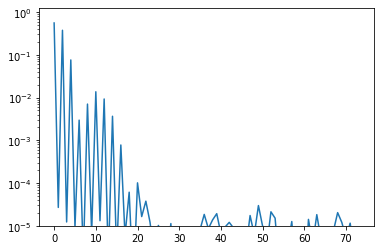

In [14]:
gl = - basis.s * rhol
gl += noise * np.random.randn(*gl.shape)
plt.semilogy(np.abs(gl))
plt.ylim([1e-5, None])

In [15]:
g_spr = spr.from_IR(gl)

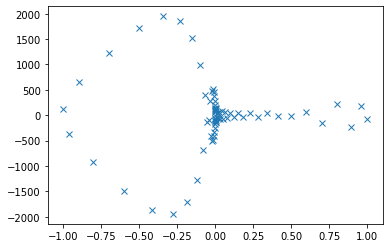

In [16]:
plt.plot(spr.sampling_points, g_spr, marker="x", ls="")

In [17]:
gl_reconst = spr.to_IR(g_spr)

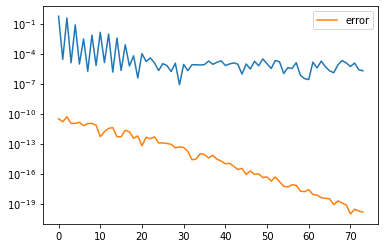

In [19]:
plt.semilogy(np.abs(gl))
plt.semilogy(np.abs(gl-gl_reconst), label="error")
plt.legend()